## **Phase 1 Exploratory Analysis: Water Usage**

In this section, I am exploring the following:

* How much water is used for the following per county:
    - Agriculture
    - Residential outdoor use (secondary)
    - Residential indoor use (primary)
    - Commercial potable use
    - Institutional potable use
    - Industrial potable use


TO DO:
*  make palette accessibility-friendly
*  add map with counties and shown population

In [385]:
# Set constant variables
color1 = '#9BC6AF' #pale green
color2 = '#B02D3A' #dark peach
color3 = '#CB7969' #peach

In [386]:
import pandas as pd

In [387]:
# Import Municipality and Industrial data for each year per county or state-wide
def import_data(region, year):
    df = pd.read_csv("./data/" + year + "_MI_" + region + ".csv")
    return df

In [388]:
# Import state-wide data
state_MI_2015 = import_data("state", "2015")
state_MI_2016 = import_data("state", "2016")
state_MI_2017 = import_data("state", "2017")
state_MI_2018 = import_data("state", "2018")
state_MI_2019 = import_data("state", "2019")

# Import county-wide data
county_MI_2015 = import_data("county", "2015")
county_MI_2016 = import_data("county", "2016")
county_MI_2017 = import_data("county", "2017")
county_MI_2018 = import_data("county", "2018")
county_MI_2019 = import_data("county", "2019")

First let's merge state-wide data from each year to one dataframe. 

    

In [389]:
# Merge all state data to one dataframe
df_state = pd.concat([state_MI_2015, state_MI_2016, state_MI_2017, state_MI_2018, state_MI_2019])

In [390]:
df_state

OBJECTID_1 STATE     acres     sqmi  TotalGPCD  TotPotGPCD  ResPotGPCD  \
0         1.0  Utah  54315900  84868.5        239         165         111   
0         1.0  Utah  54315900  84868.5        245         161         110   
0         NaN  Utah  54315900  84868.5        244         162         110   
0         NaN  Utah  54315900  84868.5        241         164         112   
0         NaN  Utah  54315900  84868.5        223         150         102   

   ComPotGPCD  InsPotGPCD  IndPotGPCD  ...  InsSecoUse  IndSecoUse  \
0          32          16           6  ...    53281.09       22.00   
0          30          14           6  ...    59312.10       27.00   
0          29          16           6  ...    56859.14       28.95   
0          28          17           7  ...         NaN         NaN   
0          25          15           7  ...         NaN         NaN   

   TotPotaSup  PotaWelSup  PotaSprSup  PotaSurSup  Year  SHAPE_Length  \
0  1134911.58   518010.10   182432.50   434469.00  2015  1.972272e+06   
0  1137366.30   517088.00   180053.40   440224.60  2016  1.972272e+06   
0  1137366.34   517087.99   180053.44   440224.57  2017  1.972272e+06   
0  1138382.30   518295.40   179767.20   440319.40  2018  1.972272e+06   
0  1138382.10   518295.50   179767.30   440319.40  2019  1.972272e+06   

     SHAPE_Area  OBJECTID  
0  2.198085e+11       NaN  
0  2.198085e+11       NaN  
0  2.198085e+11       1.0  
0  2.198085e+11       1.0  
0  2.198085e+11       1.0  

[5 rows x 34 columns]

In [391]:
df_state[['Year', 'TotalGPCD', 'TotPotGPCD', 'TotSecGPCD']]

Year  TotalGPCD  TotPotGPCD  TotSecGPCD
0  2015        239         165          75
0  2016        245         161          84
0  2017        244         162          82
0  2018        241         164          77
0  2019        223         150          73

### How has water usage across the state changed between 2015-2019? How much water usage can be accounted for by potable (treated) versus secondary (untreated) use?

In [392]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Total GPCD",
    x=df_state['Year'], 
    y=df_state['TotalGPCD'], 
    fill='tozeroy',
    text='Total GPCD',
    marker=dict(color=color2)
)) 

fig.add_trace(go.Scatter(
    name="Potable GPCD",
    x=df_state['Year'], 
    y=df_state['TotPotGPCD'],
    fill='tozeroy',
    text='Potable GPCD',
    marker=dict(color=color1)
)) 

fig.add_trace(go.Scatter(
    name="Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['TotSecGPCD'],
    fill='tozeroy',
    text='Secondary GPCD',
    marker=dict(color=color3)
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Overall Utah State-wide Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show(renderer='notebook')

Between 2015 and 2019, water usage across the state seems to have remained steady over the years, with total GPCD remaining a little under 250 GPCD. Around 64% of that can be attributed to potable use, and the remaining attributed to secondary use. 

### How is state-wide water usage being distributed between residential, industrial, institutional, and commercial properties?

In [393]:
df_state[['Year', 'TotalGPCD', 'TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD', 'IndPotGPCD']]

Year  TotalGPCD  TotPotGPCD  ResPotGPCD  ComPotGPCD  InsPotGPCD  IndPotGPCD
0  2015        239         165         111          32          16           6
0  2016        245         161         110          30          14           6
0  2017        244         162         110          29          16           6
0  2018        241         164         112          28          17           7
0  2019        223         150         102          25          15           7

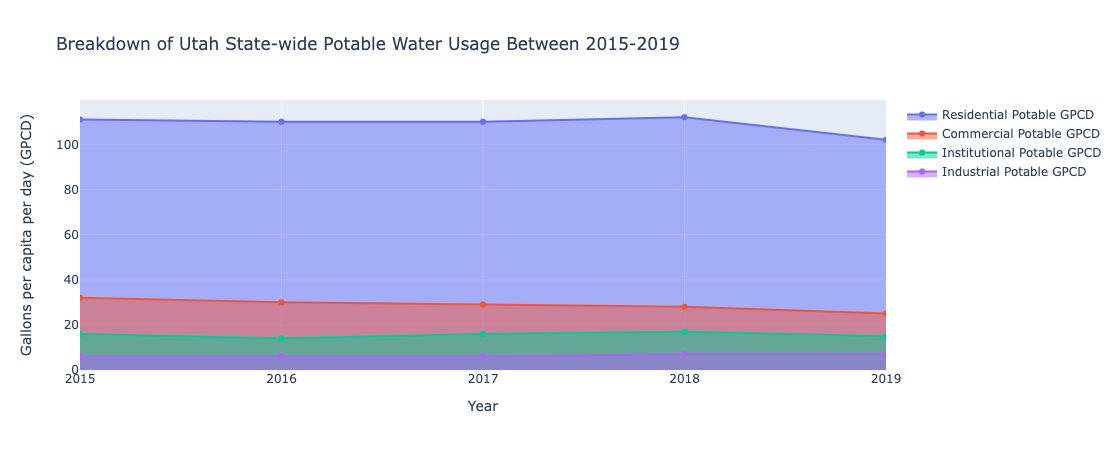

In [394]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Residential Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ResPotGPCD'],
    fill='tozeroy',
    text='Residential Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Commercial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ComPotGPCD'],
    fill='tozeroy',
    text='Commercial Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Institutional Potable GPCD",
    x=df_state['Year'], 
    y=df_state['InsPotGPCD'],
    fill='tozeroy',
    text='Institutional Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Industrial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['IndPotGPCD'],
    fill='tozeroy',
    text='Industrial Potable GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Breakdown of Utah State-wide Potable Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

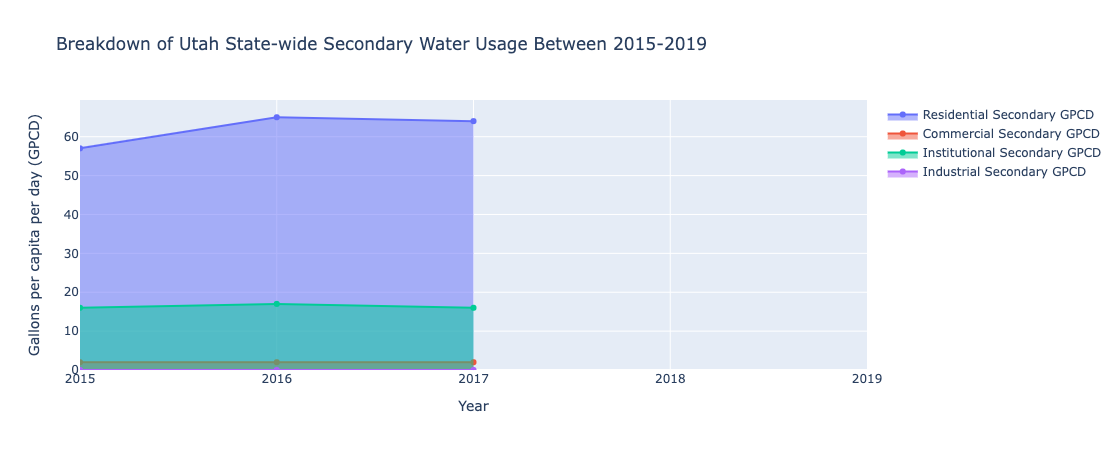

In [395]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Residential Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['ResSecGPCD'],
    fill='tozeroy',
    text='Residential Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Commercial Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['ComSecGPCD'],
    fill='tozeroy',
    text='Commercial Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Institutional Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['InsSecGPCD'],
    fill='tozeroy',
    text='Institutional Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Industrial Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['IndSecGPCD'],
    fill='tozeroy',
    text='Industrial Secondary GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Breakdown of Utah State-wide Secondary Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

Secondary state-wide water usage is unavailable in 2018 and 2019 unfortunately --> investigate why!

### Water Usage by County

In [396]:
county_MI_2015

OBJECTID  COUNTYNBR        NAME  TotalGPCD  TotPotGPCD  ResPotGPCD  \
0          1         13        KANE        304         239         142   
1          2         14     MILLARD        532         342         231   
2          3         20     SANPETE        365         140          94   
3          4          4      CARBON        273         180         127   
4          5         25        UTAH        218         132          90   
5          6          3       CACHE        284         207         118   
6          7         22      SUMMIT        342         253         152   
7          8         27  WASHINGTON        303         231         179   
8          9         10       GRAND        313         251         154   
9         10         24      UINTAH        239         187         146   
10        11         23      TOOELE        228         167         116   
11        12         21      SEVIER        360         247         141   
12        13          9    GARFIELD        626         292         167   
13        14         19    SAN JUAN        199         143         113   
14        15          2   BOX ELDER        320         238         178   
15        16         11        IRON        223         175         126   
16        17         29       WEBER        256         112          69   
17        18          8       EMERY        577         136         112   
18        19         17        RICH       1240        1028         896   
19        20         26     WASATCH        335         190         152   
20        21          1      BEAVER        552         232         138   
21        22          5     DAGGETT        634         390         238   
22        23          6       DAVIS        235         107          76   
23        24         28       WAYNE        575         253         179   
24        25         16       PIUTE        395         308         185   
25        26         15      MORGAN        242         111          94   
26        27         12        JUAB        364         237         158   
27        28         18   SALT LAKE        206         181         119   
28        29          7    DUCHESNE        314         205         124   

    ComPotGPCD  InsPotGPCD  IndPotGPCD  TotSecGPCD  ...  InsSecoUse  \
0           43          52           2          65  ...        3.63   
1           43          47          21         190  ...      101.51   
2           10          31           5         224  ...     1038.00   
3           22          22           9          92  ...      795.54   
4           29           9           3          86  ...    10650.10   
5           72          10           7          77  ...     2726.05   
6           90          10           0          89  ...     2240.90   
7           33          17           1          72  ...     8450.14   
8           76          18           2          62  ...      408.90   
9           25           7           9          52  ...      658.70   
10          22          24           6          60  ...     1465.36   
11          27          65          15         114  ...      840.60   
12          85          37           3         334  ...      110.30   
13          27           3           0          56  ...      156.10   
14          19           8          34          82  ...     1488.70   
15          31          16           2          47  ...      566.40   
16          23           7          12         145  ...     3841.44   
17          14           6           4         441  ...      718.27   
18         104          28           0         211  ...        8.60   
19          33           5           0         145  ...        0.00   
20          53          11          31         320  ...      580.90   
21         109          41           2         244  ...       85.00   
22          19           9           3         129  ...     7776.97   
23          41          26           6         322  ...      133.69   
24      

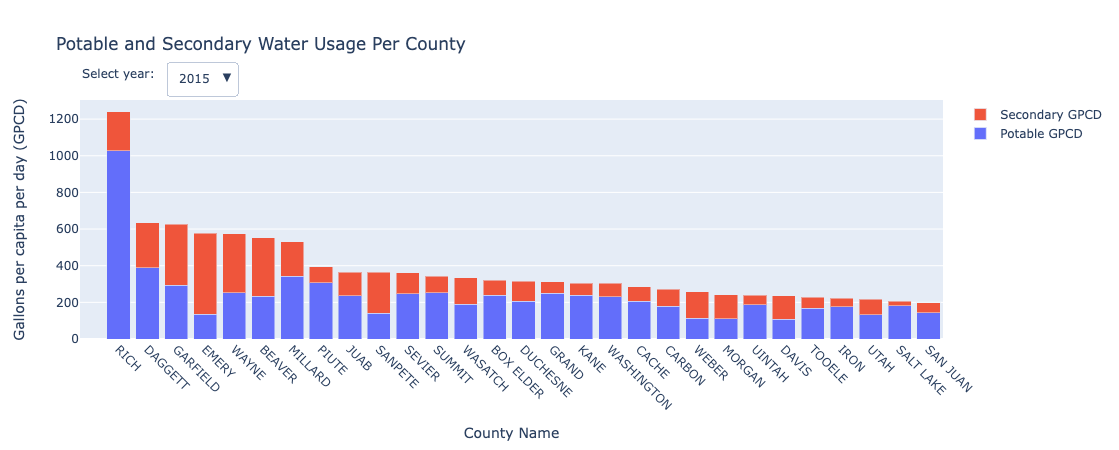

In [397]:
# highlight Salt Lake County
# add total GPCD state-wide (is this a mean, median, sum??)
# color / label the counties that meter secondary water

# import plotly.express as px


# fig = px.bar(county_MI_2015, x='NAME', y='TotSecGPCD', height=400)

import plotly.graph_objects as go

x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotPotGPCD'], 
    name='Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotSecGPCD'], 
    name='Secondary GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Potable and Secondary Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'],county_MI_2015['NAME']],
                        'y':[county_MI_2015['TotPotGPCD'],county_MI_2015['TotSecGPCD']]}],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'],county_MI_2016['NAME']],
                        'y':[county_MI_2016['TotPotGPCD'],county_MI_2016['TotSecGPCD']]}],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'],county_MI_2017['NAME']],
                        'y':[county_MI_2017['TotPotGPCD'],county_MI_2017['TotSecGPCD']]}],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'],county_MI_2018['NAME']],
                        'y':[county_MI_2018['TotPotGPCD'],county_MI_2018['TotSecGPCD']]}],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'],county_MI_2019['NAME']],
                        'y':[county_MI_2019['TotPotGPCD'],county_MI_2019['TotSecGPCD']]}],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()

In [398]:
# need to add new columns to original dataframe
def add_stat_columns(df_county, df_state, color_true=color3, color_false=color1):
    df_county = df_county.assign(Utah_TotalGPCD = df_state['TotalGPCD'][0])
    df_county = df_county.assign(Mean_TotalGPCD = df_county['TotalGPCD'].describe()['mean'])
    df_county = df_county.assign(Median_TotalGPCD = df_county['TotalGPCD'].describe()['50%'])
    
    df_county = df_county.assign(Utah_TotPotGPCD = df_state['TotPotGPCD'][0])
    df_county = df_county.assign(Mean_TotPotGPCD = df_county['TotPotGPCD'].describe()['mean'])
    df_county = df_county.assign(Median_TotPotGPCD = df_county['TotPotGPCD'].describe()['50%'])
    
    df_county = df_county.assign(Utah_TotSecGPCD = df_state['TotSecGPCD'][0])
    df_county = df_county.assign(Mean_TotSecGPCD = df_county['TotSecGPCD'].describe()['mean'])
    df_county = df_county.assign(Median_TotSecGPCD = df_county['TotSecGPCD'].describe()['50%'])
    
    df_county = df_county.assign(color = np.where(df_county['NAME'] == 'SALT LAKE', color_true, color_false))
    return df_county

county_MI_2015 = add_stat_columns(county_MI_2015, state_MI_2015)
county_MI_2016 = add_stat_columns(county_MI_2016, state_MI_2016)
county_MI_2017 = add_stat_columns(county_MI_2017, state_MI_2017)
county_MI_2018 = add_stat_columns(county_MI_2018, state_MI_2018)
county_MI_2019 = add_stat_columns(county_MI_2019, state_MI_2019)

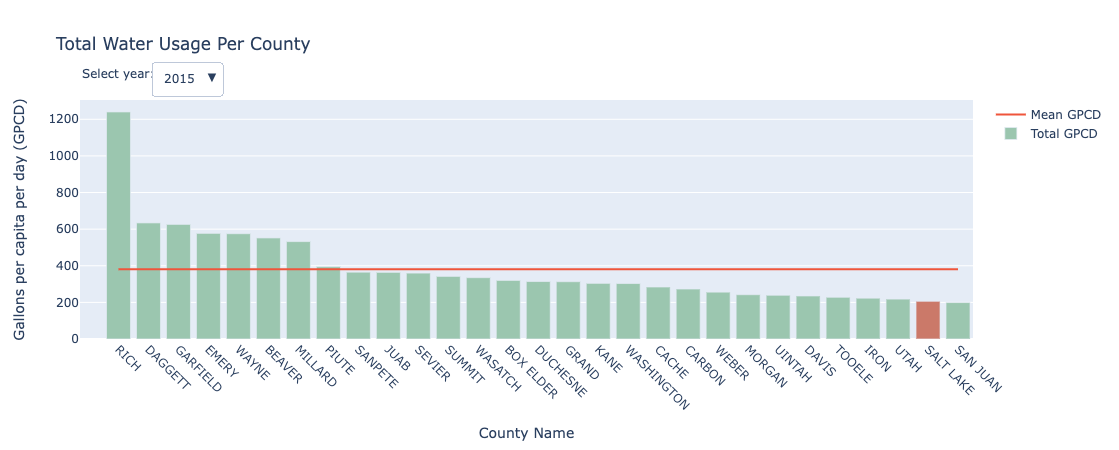

In [399]:
# highlight Salt Lake County
# add total GPCD state-wide (is this a mean, median, sum??)
# color / label the counties that meter secondary water

# import plotly.express as px
 # TO DO:
    # functionalize
    # decide on mean, median or utah reference line

import plotly.graph_objects as go

ref_var = 'Mean_TotalGPCD'
ref_var_txt = 'Mean GPCD'

fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotalGPCD'], 
    name='Total GPCD',
    marker=dict(color = county_MI_2015['color'])
))

fig.add_trace(go.Scatter(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015[ref_var], 
    name=ref_var_txt,
    marker=dict(color = county_MI_2015['color'])

))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Total Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
                        'y':[county_MI_2015['TotalGPCD'], county_MI_2015[ref_var]],
                        'marker':dict(color = county_MI_2015['color'])
                    }],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'], county_MI_2016['NAME']],
                        'y':[county_MI_2016['TotalGPCD'], county_MI_2016[ref_var]],
                        'marker':dict(color = county_MI_2016['color'])
                    }],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'], county_MI_2017['NAME']],
                        'y':[county_MI_2017['TotalGPCD'], county_MI_2017[ref_var]],
                        'marker':dict(color = county_MI_2017['color'])
                    }],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'], county_MI_2018['NAME']],
                        'y':[county_MI_2018['TotalGPCD'], county_MI_2018[ref_var]],
                        'marker':dict(color = county_MI_2018['color'])
                    }],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'], county_MI_2019['NAME']],
                        'y':[county_MI_2019['TotalGPCD'], county_MI_2019[ref_var]],
                        'marker':dict(color = county_MI_2019['color'])
                    }],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.08,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()

In [400]:
# Plot bar chart of Total, Potable or Secondary Water Usage in GPCD per county (select year)
def GPCD_per_county_barchart(title, bar_var, bar_var_txt, ref_var, ref_var_txt):
    
    import plotly.graph_objects as go

    fig = go.Figure(go.Bar(
        x=county_MI_2015['NAME'], 
        y=county_MI_2015[bar_var], 
        name=bar_var_txt,
        marker=dict(color = county_MI_2015['color'])
    ))

    fig.add_trace(go.Scatter(
        x=county_MI_2015['NAME'], 
        y=county_MI_2015[ref_var], 
        name=ref_var_txt,
        marker=dict(color = county_MI_2015['color'])

    ))

    # Add axis labels, title, etc.
    fig.update_layout(
        barmode='stack', 
        xaxis={'categoryorder':'total descending', 'tickangle':45},
        title=title,
        xaxis_title="County Name",
        yaxis_title="Gallons per capita per day (GPCD)",
    )

    # Add dropdown
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=[{
                            'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
                            'y':[county_MI_2015[bar_var], county_MI_2015[ref_var]],
                            'marker':dict(color = county_MI_2015['color'])
                        }],
                        label="2015",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2016['NAME'], county_MI_2016['NAME']],
                            'y':[county_MI_2016[bar_var], county_MI_2016[ref_var]],
                            'marker':dict(color = county_MI_2016['color'])
                        }],
                        label="2016",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2017['NAME'], county_MI_2017['NAME']],
                            'y':[county_MI_2017[bar_var], county_MI_2017[ref_var]],
                            'marker':dict(color = county_MI_2017['color'])
                        }],
                        label="2017",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2018['NAME'], county_MI_2018['NAME']],
                            'y':[county_MI_2018[bar_var], county_MI_2018[ref_var]],
                            'marker':dict(color = county_MI_2018['color'])
                        }],
                        label="2018",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2019['NAME'], county_MI_2019['NAME']],
                            'y':[county_MI_2019[bar_var], county_MI_2019[ref_var]],
                            'marker':dict(color = county_MI_2019['color'])
                        }],
                        label="2019",
                        method="restyle"
                    )
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.2,
                yanchor="top"
            ),
        ]
    )

    # Add annotation
    fig.update_layout(
        annotations=[
            dict(text="Select year:", showarrow=False,
            x=0, y=1.15, yref="paper", align="left")
        ]
    )

    return fig.show()

### **Water Usage Per County Per Year**

Looking at total water usage in gallons per capita per day, Rich County is consistently in the Top 3 counties. On the contrary, Salt Lake County, highlighted in the bar charts, is consistently in the bottom 3 counties. Why is most densely populated county using the lowest amount of water? Part of this may be because it is one of the only counties in the state where secondary (untreated) water is metered, so residents are more stringent with their landscaping water use. Another may be that due to the more dense population, there is less land to landscape, and therefore less to water. 

A few other factors: 
* agriculture is higher in some of the counties with water usage above the average
* the northern counties use more water and may also get more precipitation, so can maintain landscaped lawns
* southern counties 


A few trends are evident from total water usage charted per county each year. First, Rich County is consistently in the Top 3 counties with the highest total water usage in gallons per capita per day. This county is in the northeastern-most tip of Utah, where the weather is consistenly colder and more precipitous than other counties in Utah (show this data and compare to the average). 

On the contrary, Salt Lake County is the most densely populated county, and consistently in the Bottom 3 counties with total water usage in GPCD. More high density population may be one reason for this, with less lawn space and less agriculture (this can be investigated by looking at the secondary water usage below). 

Factors to investigate:
* landscaping data - what percentage of lawns are landscaped, what is the avg plot of land size for residents, etc.
* temperature and precipitation data
* policies around metering
* presence of local Master Gardeners?
* agriculture
* population density

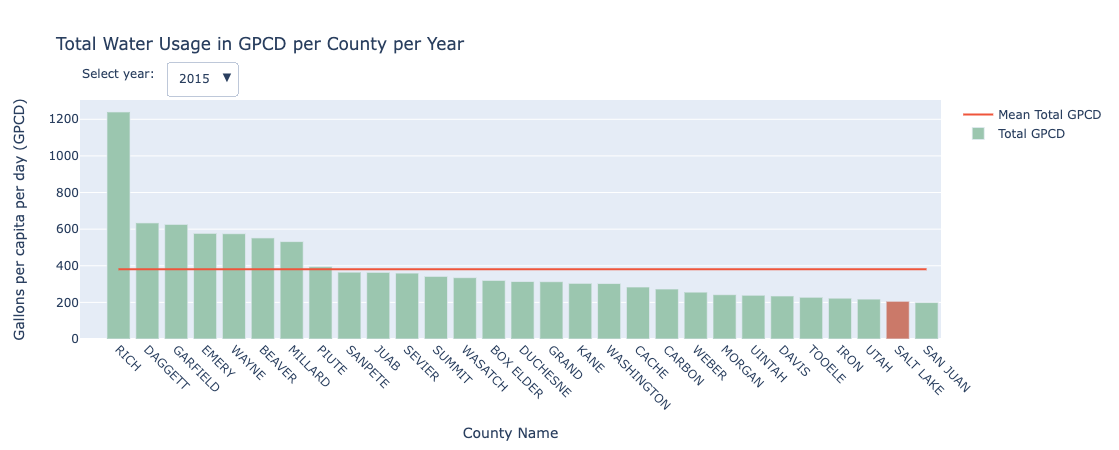

In [401]:
GPCD_per_county_barchart(title='Total Water Usage in GPCD per County per Year', 
                         bar_var='TotalGPCD', 
                         bar_var_txt='Total GPCD', 
                         ref_var='Mean_TotalGPCD', 
                         ref_var_txt='Mean Total GPCD')

When we break it down into Potable vs Secondary water usage, Rich County's high water usage seems to primarily due to their higher than average potable (treated/indoor) water usage. So why does Rich County use so much water? Is this primarily due to residential water use? Or is there a large presence of commercial, institutional, and/or industrial sites that require lots of treated water? Or are there fewer policies around water consumption?

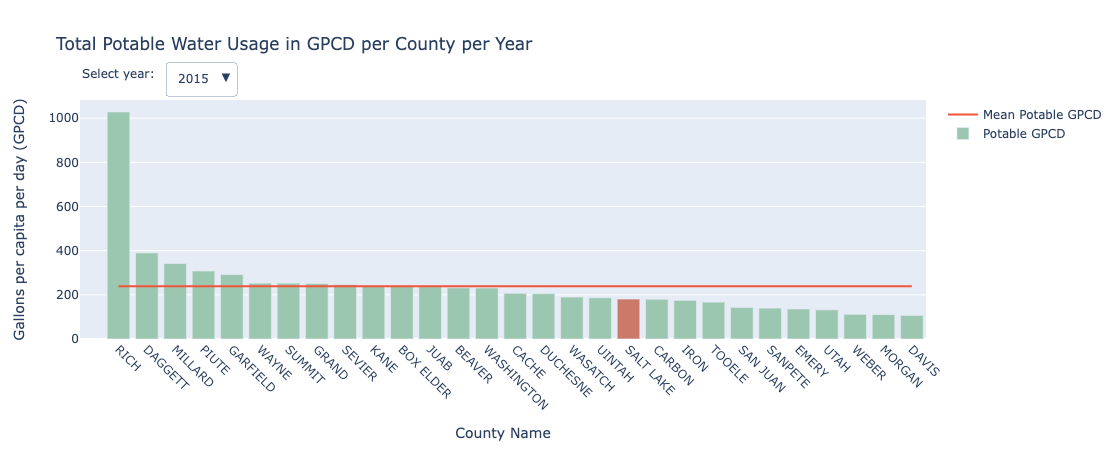

In [402]:
GPCD_per_county_barchart(title='Total Potable Water Usage in GPCD per County per Year', 
                         bar_var='TotPotGPCD', 
                         bar_var_txt='Potable GPCD', 
                         ref_var='Mean_TotPotGPCD', 
                         ref_var_txt='Mean Potable GPCD')

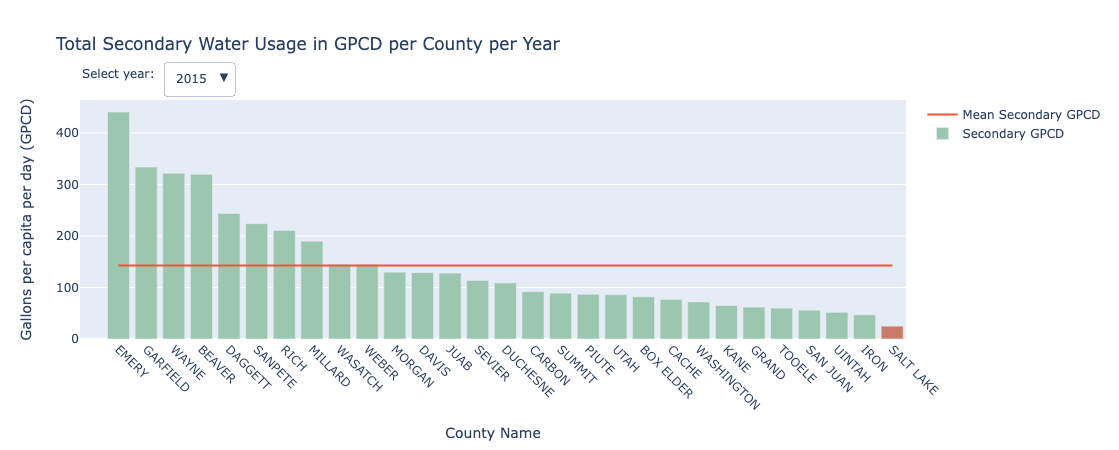

In [403]:
GPCD_per_county_barchart(title='Total Secondary Water Usage in GPCD per County per Year', 
                         bar_var='TotSecGPCD', 
                         bar_var_txt='Secondary GPCD', 
                         ref_var='Mean_TotSecGPCD', 
                         ref_var_txt='Mean Secondary GPCD')

In [404]:
county_MI_2015[['NAME','TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD','IndPotGPCD']] #138
county_MI_2016[['NAME','TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD','IndPotGPCD']] #143
county_MI_2017[['NAME','TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD','IndPotGPCD']] #160
county_MI_2018[['NAME','TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD','IndPotGPCD']] #156
county_MI_2019[['NAME','TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD','IndPotGPCD']] #141
(138+143+160+156+141)/5

147.6

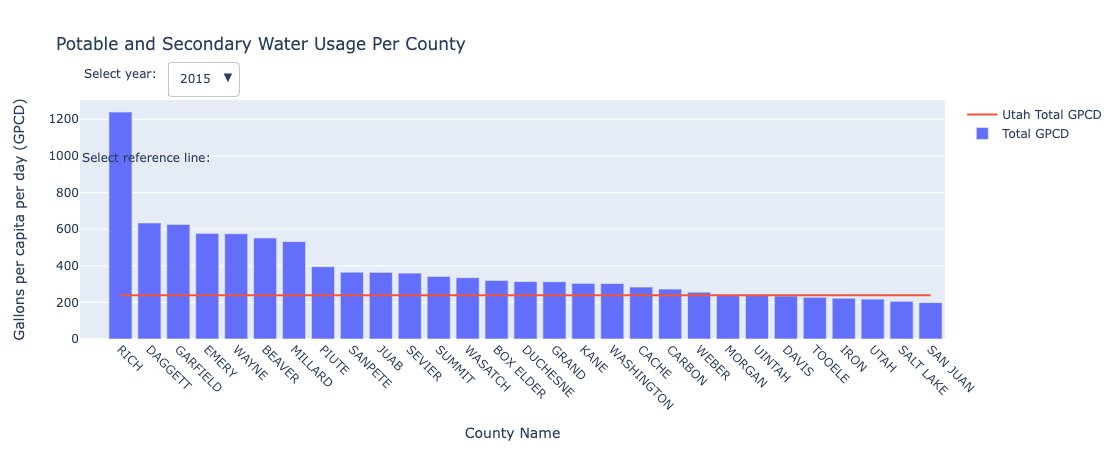

In [405]:
import plotly.graph_objects as go

x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotalGPCD'], 
    name='Total GPCD'
))

fig.add_trace(go.Scatter(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['Utah_TotalGPCD'], 
    name='Utah Total GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Potable and Secondary Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
                        'y':[county_MI_2015['TotalGPCD'], county_MI_2015['Utah_TotalGPCD']],
#                         'visible':[True, True]
                    }],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'], county_MI_2016['NAME']],
                        'y':[county_MI_2016['TotalGPCD'], county_MI_2016['Utah_TotalGPCD']],
#                         'visible':[True, True]
                    }],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'], 'undefined'],
                        'y':[county_MI_2017['TotalGPCD'],'undefined'],
#                         'visible':[True, True]
                    }],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'], 'undefined'],
                        'y':[county_MI_2018['TotalGPCD'],'undefined'],
#                         'visible':[True, True]
                    }],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'], 'undefined'],
                        'y':[county_MI_2019['TotalGPCD'],'undefined'],
#                         'visible':[True, True]
                    }],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
#         dict(
#             buttons=list([
#                 dict(
#                     args=[{
#                         'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
#                         'y':['undefined', county_MI_2015['Utah_TotalGPCD']], 
# #                         'visible':[True, True]
#                     }],
#                     label="State-wide",
#                     method="restyle"
#                 ),
#                 dict(
#                     args=[{
#                         'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
#                         'y':['undefined', county_MI_2015['Mean_TotalGPCD']], 
# #                         'visible':[True, True]
#                     }],
#                     label="Mean",
#                     method="restyle"
#                 ),
#                 dict(
#                     args=[{
#                         'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
#                         'y':['undefined', county_MI_2015['Median_TotalGPCD']], 
# #                         'visible':[True, True]
#                     }],
#                     label="Median",
#                     method="restyle"
#                 )
#             ]),
#             direction="down",
#             pad={"r": 10, "t": 10},
#             showactive=True,
#             x=0.58,
#             xanchor="left",
#             y=1.08,
#             yanchor="top"
#         )
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(
            text="Select year:", 
            showarrow=False,
            x=0, 
            y=1.15, 
            yref="paper", 
            align="left"
        ),
        dict(
            text="Select reference line:", 
            showarrow=False,
            x=0.9, 
            y=0.8, 
            yref="paper", 
            align="left"
        )
    ]
)

fig.show()

In [406]:

var = 'NAME'
county_MI_2015['Utah_TotalGPCD'][county_MI_2015[var] == 'SALT LAKE']

27    239
Name: Utah_TotalGPCD, dtype: int64

In [407]:
county_MI_2016

OBJECTID  COUNTYNBR        NAME  TotalGPCD  TotPotGPCD  ResPotGPCD  \
0          1         20     SANPETE        358         139         101   
1          2         11        IRON        238         190         138   
2          3         13        KANE        473         317         172   
3          4         29       WEBER        263         109          65   
4          5         19    SAN JUAN        292         148         108   
5          6          9    GARFIELD        404         229         127   
6          7         17        RICH        835         697         473   
7          8         22      SUMMIT        333         242         159   
8          9         23      TOOELE        200         153         117   
9         10          1      BEAVER        714         240         143   
10        11          2   BOX ELDER        318         241         181   
11        12          3       CACHE        269         194         136   
12        13         24      UINTAH        252         209         157   
13        14         10       GRAND        475         263         151   
14        15         27  WASHINGTON        313         222         177   
15        16         14     MILLARD        565         361         243   
16        17         26     WASATCH        293         134         113   
17        18         12        JUAB        308         187         138   
18        19         25        UTAH        222         129          90   
19        20          7    DUCHESNE        341         234         113   
20        21          5     DAGGETT        852         704         541   
21        22         16       PIUTE        559         464         437   
22        23          6       DAVIS        252         101          74   
23        24         15      MORGAN        243         110          93   
24        25         28       WAYNE        574         251         181   
25        26          8       EMERY        576         143         118   
26        27         21      SEVIER        630         214         144   
27        28          4      CARBON        273         174         103   
28        29         18   SALT LAKE        209         182         119   

    ComPotGPCD  InsPotGPCD  IndPotGPCD  TotSecGPCD  ...  Utah_TotalGPCD  \
0           13          23           2         219  ...             245   
1           33          16           3          49  ...             245   
2           61          64          20         156  ...             245   
3           29           3          13         154  ...             245   
4           20          19           1         144  ...             245   
5           66          29           7         175  ...             245   
6          201          23           0         138  ...             245   
7           61          10          12          90  ...             245   
8           19          10           8          47  ...             245   
9           66           4          28         473  ...             245   
10          19           6          35          77  ...             245   
11          30          10          18          75  ...             245   
12          22          26           4          42  ...             245   
13         108           2           2         213  ...             245   
14          28          15           2          91  ...             245   
15          40          59          19         204  ...             245   
16          16           4           1         159  ...             245   
17          23          11          15         121  ...             245   
18          28           8           4          93  ...             245   
19          44           5          72         108  ...             245   
20         126          34           2         148  ...             245   
21           8           2          17          95  ...             245   
22          17           7           3         150  ...   

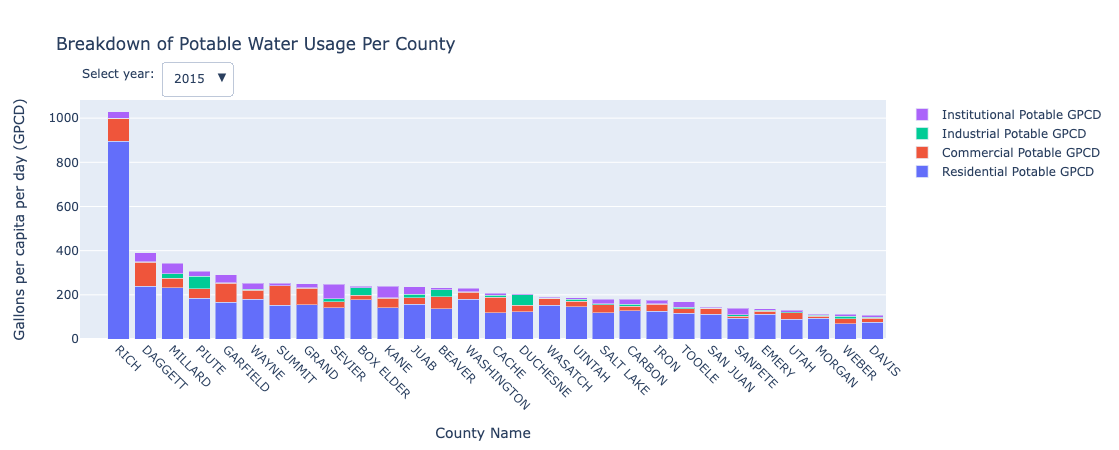

In [408]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['ResPotGPCD'], 
    name='Residential Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['ComPotGPCD'], 
    name='Commercial Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['IndPotGPCD'], 
    name='Industrial Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['InsPotGPCD'], 
    name='Institutional Potable GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Breakdown of Potable Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'],county_MI_2015['NAME'], county_MI_2015['NAME'], county_MI_2015['NAME']],
                        'y':[county_MI_2015['ResPotGPCD'],county_MI_2015['ComPotGPCD'], county_MI_2015['IndPotGPCD'], county_MI_2015['InsPotGPCD']]}],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'],county_MI_2016['NAME'], county_MI_2016['NAME'], county_MI_2016['NAME']],
                        'y':[county_MI_2016['ResPotGPCD'],county_MI_2016['ComPotGPCD'], county_MI_2016['IndPotGPCD'], county_MI_2016['InsPotGPCD']]}],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'],county_MI_2017['NAME'], county_MI_2017['NAME'], county_MI_2017['NAME']],
                        'y':[county_MI_2017['ResPotGPCD'],county_MI_2017['ComPotGPCD'], county_MI_2017['IndPotGPCD'], county_MI_2017['InsPotGPCD']]}],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'],county_MI_2018['NAME'], county_MI_2018['NAME'], county_MI_2018['NAME']],
                        'y':[county_MI_2018['ResPotGPCD'],county_MI_2018['ComPotGPCD'], county_MI_2018['IndPotGPCD'], county_MI_2018['InsPotGPCD']]}],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'],county_MI_2019['NAME'], county_MI_2019['NAME'], county_MI_2019['NAME']],
                        'y':[county_MI_2019['ResPotGPCD'],county_MI_2019['ComPotGPCD'], county_MI_2019['IndPotGPCD'], county_MI_2019['InsPotGPCD']]}],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()

In [437]:
# AGGREGATE ACROSS ALL YEARS
# average across all 5 years
# [county_MI_2015['ResPotGPCD'],county_MI_2016['ResPotGPCD'], county_MI_2017['ResPotGPCD'], county_MI_2018['ResPotGPCD'], county_MI_2019['ResPotGPCD']]
# mean(axis=1)

df_concat = pd.concat((county_MI_2015, county_MI_2016, county_MI_2017, county_MI_2018, county_MI_2019))
by_row_index = df_concat.groupby(df_concat.NAME, as_index=False)
df_means = by_row_index.mean()
# pull county names back in to aggregated dataframe
counties_df = county_MI_2015[['NAME', 'COUNTYNBR']]
df_means = pd.merge(df_means, counties_df, how='inner', on='COUNTYNBR')
df_means
df_means = df_means.assign(color = np.where(df_means['NAME'] == 'SALT LAKE', color3, color1))



In [453]:
def GPCD_breakdown_per_county_barchart(potable=True):
    col_arr = ['ResPotGPCD', 'ComPotGPCD','InsPotGPCD','IndPotGPCD'] if potable else ['ResSecGPCD', 'ComSecGPCD','InsSecGPCD','IndSecGPCD']
    txt = 'Potable' if potable else 'Secondary'


    import plotly.graph_objects as go

    fig = go.Figure(go.Bar(
        x=df_means['NAME'], 
        y=df_means[col_arr[0]], 
        name='Residential ' + txt + ' GPCD',
        marker=dict(color = df_means['color'])
    ))


    # Add axis labels, title, etc.
    fig.update_layout(
        barmode='stack', 
        xaxis={'categoryorder':'total descending', 'tickangle':45},
        title="Breakdown of " + txt + " Water Usage Per County",
        xaxis_title="County Name",
        yaxis_title="Gallons per capita per day (GPCD)",
    )

    # Add dropdown
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=[{
                            'x':[df_means['NAME']],
                            'y':[df_means[col_arr[0]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Residential " + txt + " GPCD",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[df_means['NAME']],
                            'y':[df_means[col_arr[1]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Commercial " + txt + " GPCD",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[df_means['NAME']],
                            'y':[df_means[col_arr[2]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Institutional " + txt + " GPCD",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[df_means['NAME']],
                            'y':[df_means[col_arr[3]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Industrial " + txt + " GPCD",
                        method="restyle"
                    ),
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.2,
                yanchor="top"
            ),
        ]
    )

    # Add annotation
    fig.update_layout(
        annotations=[
            dict(text="Select year:", showarrow=False,
            x=0, y=1.15, yref="paper", align="left")
        ]
    )

    return fig.show()

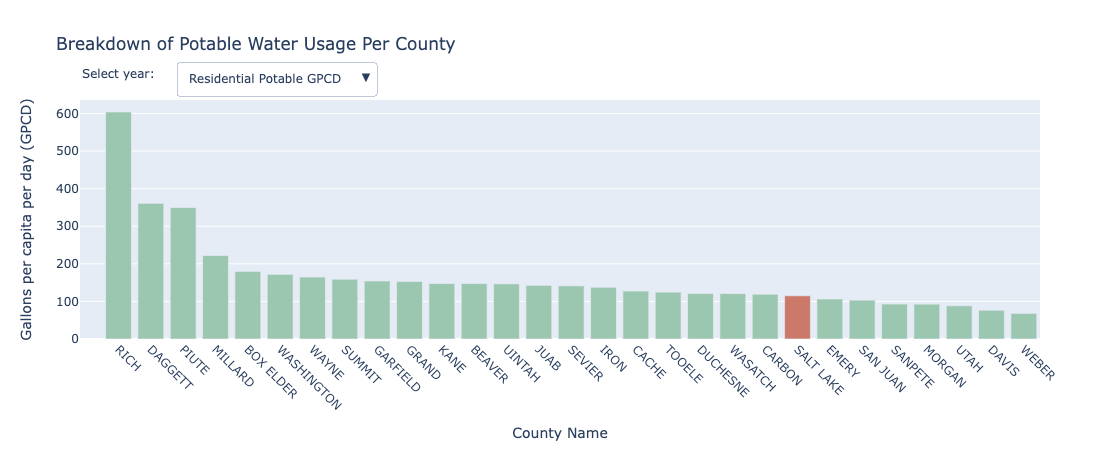

In [454]:
GPCD_breakdown_per_county_barchart(True)

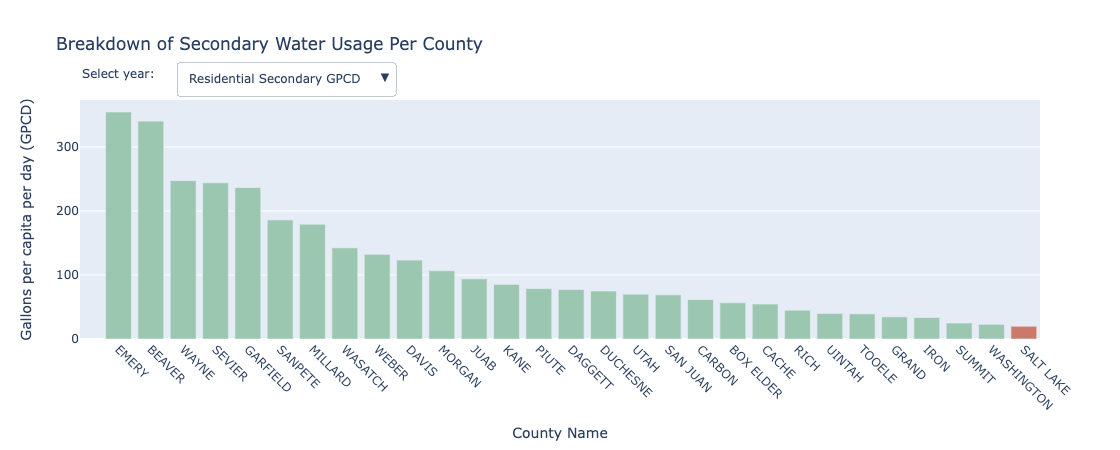

In [455]:
GPCD_breakdown_per_county_barchart(False)